<a href="https://colab.research.google.com/github/manekgnath/Machine-Learning/blob/main/ML_project_7_Stroke_prediction_using_KNN%2CLogisticRegression_and_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("/content/stroke data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df['gender'].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
#df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
df['Residence_type'].value_counts()

,count
Residence_type,
Urban,2490
Rural,2419


In [ ]:
df['gender']= df['gender'].map({'Female':0,'Male':1,'Other':2})
df['ever_married']= df['ever_married'].map({'No':0,'Yes':1})
df['Residence_type']= df['Residence_type'].map({'Urban':0,'Rural':1})

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.drop(['id'],axis=1,inplace=True)

In [ ]:
y = df['stroke']
x = df.drop('stroke',axis=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.956551255940258

In [ ]:
y_test[:5]

,stroke
1506,0
1226,0
1887,0
2195,0
89,1


In [ ]:
y_pred[:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
model1.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred1 = model1.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred1)

0.5777325186693822

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neighbors=np.arange(1,11)
train_accuracy=[]
test_accuracy=[]
for i in neighbors:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  train_accuracy.append(knn.score(x_train,y_train))
  test_accuracy.append(knn.score(x_test,y_test))
print(train_accuracy)
print(test_accuracy)

[1.0, 0.9621653084982538, 0.9615832363213038, 0.959837019790454, 0.959254947613504, 0.9580908032596042, 0.9589639115250291, 0.9577997671711292, 0.9580908032596042, 0.9577997671711292]
[0.923285811269518, 0.9531568228105907, 0.9470468431771895, 0.9545145960624576, 0.9531568228105907, 0.9545145960624576, 0.9524779361846571, 0.9558723693143245, 0.955193482688391, 0.9558723693143245]


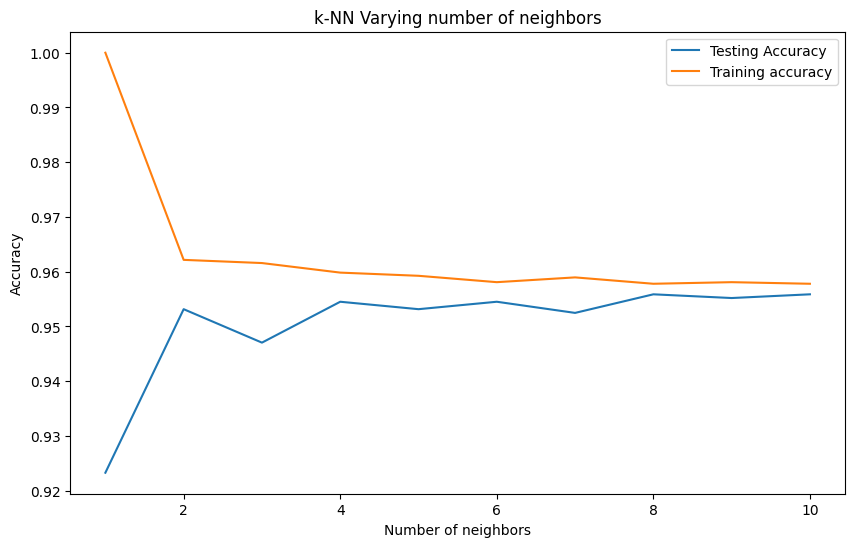

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred3)

0.9531568228105907

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
ypred4 = model3.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,ypred4)

0.9260013577732519

In [ ]:
cm = confusion_matrix(y_test,ypred4)
cm

array([[1360,   49],
       [  60,    4]])

In [ ]:
clr = classification_report(y_test,ypred4)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1409
           1       0.08      0.06      0.07        64

    accuracy                           0.93      1473
   macro avg       0.52      0.51      0.51      1473
weighted avg       0.92      0.93      0.92      1473



In [ ]:
test_accuracy = model3.score(x_test,y_test)
test_accuracy

0.9260013577732519